# Forecast Methods

- [Method 1: Percent Over Last Year](#percentoverlastyear)
- [Method 2: Calculated Percent Over Last Year](#calculatedpercentoverlastyear)
- [Method 3: Last Year to This Year](#lastyeartothisyear)
- [Method 4: Moving Average](#movingaverage)
- [Method 5: Linear Approximation](#linearapproximation)
- [Method 6: Least Squares Regression](#leastsquaresregression)
- Method 7: Second Degree Approximation
- Method 8: Flexible Method
- Method 9: Weighted Moving Average
- Method 10: Linear Smoothing
- Method 11: Exponential Smoothing
- Method 12: Exponential Smoothing with Trend and Seasonality


In [4]:
# Imports
from decimal import Decimal

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Create dataset (DataFrame for presentation purposes)
one_year_ago = [128, 117, 115, 125, 122, 137, 140, 129, 131, 114, 119, 137]
two_years_ago = [125, 123, 115, 137, 122, 130, 141, 128, 118, 123, 139, 133]
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

data = pd.DataFrame([one_year_ago, two_years_ago],
                    index=['n-1', 'n-2'],
                    columns=cols)

data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
n-1,128,117,115,125,122,137,140,129,131,114,119,137
n-2,125,123,115,137,122,130,141,128,118,123,139,133


In [63]:
# Helper function to create simple plots of historical and forecasted data

def make_plots(forecast_data, method_name):
    plt.subplots(figsize=(15, 6));

    plt.subplot(1, 2, 1);
    plt.plot(cols, one_year_ago, 'go--', label='One Yr Ago');
    plt.plot(cols, two_years_ago, 'ko--', label='Two Yrs Ago');
    plt.title('Historical');
    plt.ylabel('Sales');
    plt.ylim([110, 165]);
    plt.xlabel('Month');
    plt.legend(loc='lower right');

    plt.subplot(1, 2, 2);
    plt.plot(cols, forecast_data, 'bo--', label='Next Year');
    plt.title(f'Forecast - {method_name}');
    plt.ylabel('Sales');
    plt.ylim([110, 165]);
    plt.xlabel('Month');
    plt.legend(loc='lower right');

## <a name="percentoverlastyear"></a>Method 1: Percent Over Last Year

This method multiplies each forecast period by a given, static growth/decline rate.

In [21]:
percent_1 = Decimal(10)

percent_over_last_year = [Decimal(n) * (1 + percent_1 / 100) for n in one_year_ago]
percent_over_last_year

[Decimal('140.8'),
 Decimal('128.7'),
 Decimal('126.5'),
 Decimal('137.5'),
 Decimal('134.2'),
 Decimal('150.7'),
 Decimal('154.0'),
 Decimal('141.9'),
 Decimal('144.1'),
 Decimal('125.4'),
 Decimal('130.9'),
 Decimal('150.7')]

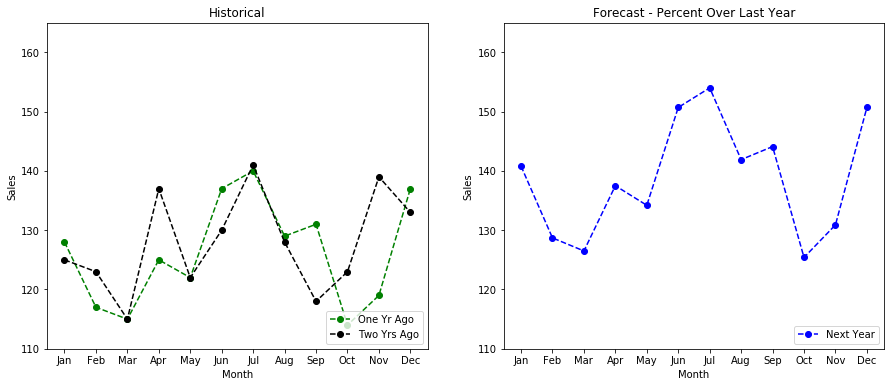

In [64]:
make_plots(percent_over_last_year, 'Percent Over Last Year')

## <a name="calculatedpercentoverlastyear"></a>Method 2: Calculated Percent Over Last Year

Takes a given number of periods to include from the prior years, calculates a year-over-year growth rate from those slices, then forecasts every period for the next year by applying the calculated growth rate.

In [24]:
periods_2 = 4

n_minus_2_sales = sum(two_years_ago[-periods_2:])
n_minus_1_sales = sum(one_year_ago[-periods_2:])
percent_2 = Decimal((n_minus_1_sales / n_minus_2_sales - 1) * 100)

calculated_percent_over_last_year = [Decimal(n) * (1 + percent_2 / 100) for n in one_year_ago]
calculated_percent_over_last_year

[Decimal('125.0058479532163744352146750'),
 Decimal('114.2631578947368422571884139'),
 Decimal('112.3099415204678364066381846'),
 Decimal('122.0760233918128656593893311'),
 Decimal('119.1461988304093568835639871'),
 Decimal('133.7953216374269007626907069'),
 Decimal('136.7251461988304095385160508'),
 Decimal('125.9824561403508773604897897'),
 Decimal('127.9356725146198832110400190'),
 Decimal('111.3333333333333334813630700'),
 Decimal('116.2163742690058481077386432'),
 Decimal('133.7953216374269007626907069')]

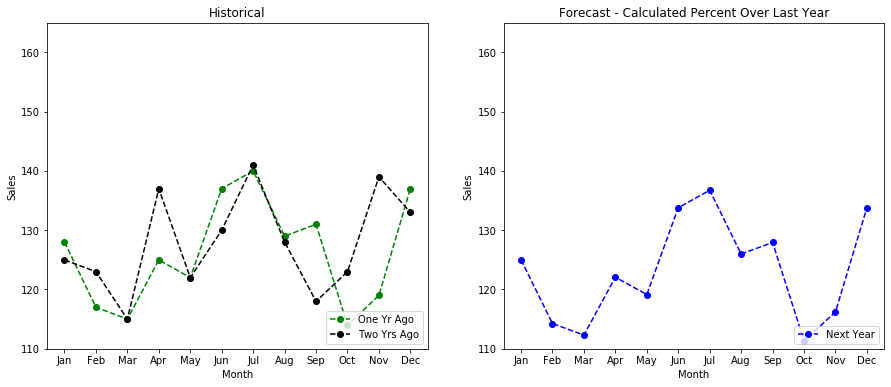

In [65]:
make_plots(calculated_percent_over_last_year, 'Calculated Percent Over Last Year')

## <a name="lastyeartothisyear"></a>Method 3: Last Year to This Year

Uses the same period data from the last year as the forecast for next year. In other words, the forecast applies a 'percent over last year' growth rate of 0%.

In [23]:
last_year_to_this_year = [Decimal(n) for n in one_year_ago]
last_year_to_this_year

[Decimal('128'),
 Decimal('117'),
 Decimal('115'),
 Decimal('125'),
 Decimal('122'),
 Decimal('137'),
 Decimal('140'),
 Decimal('129'),
 Decimal('131'),
 Decimal('114'),
 Decimal('119'),
 Decimal('137')]

In [67]:
# make_plots(last_year_to_this_year, 'Last Year to This Year')

## <a name="movingaverage"></a>Method 4: Moving Average

Averages the prior given number of periods together to determine the next period's value. (Note: example doesn't round the forecasted value each iteration).

In [26]:
periods_4 = 4
moving_average = one_year_ago[-periods_4:]

for i in range(12):
    moving_average.append(Decimal(np.mean(moving_average[-periods_4:])))

del moving_average[:periods_4]
moving_average

[Decimal('125.25'),
 Decimal('123.8125'),
 Decimal('126.265625'),
 Decimal('128.08203125'),
 Decimal('125.8525390625'),
 Decimal('126.003173828125'),
 Decimal('126.55084228515625'),
 Decimal('126.6221466064453125'),
 Decimal('126.257175445556640625'),
 Decimal('126.35833454132080078125'),
 Decimal('126.4471247196197509765625'),
 Decimal('126.421195328235626220703125')]

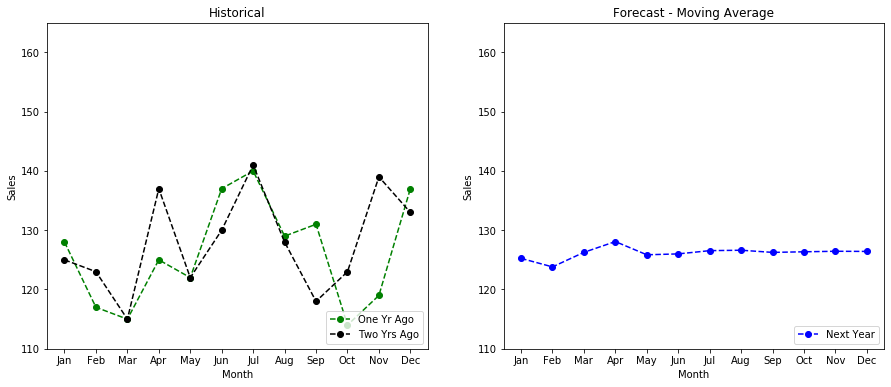

In [68]:
make_plots(moving_average, "Moving Average")

## <a name="linearapproximation"></a>Method 5: Linear Approximation

Calculates a slope (trend) from the endpoints of a given number of periods from historical data, then applies that trend to create the forecast.

In [71]:
periods_5 = 4
slope_5 = Decimal((one_year_ago[-1] - one_year_ago[-(periods_5 + 1)]) / periods_5)

linear_approximation = [Decimal(one_year_ago[-1]) + (slope_5 * (i + 1)) for i in range(len(one_year_ago))]
linear_approximation

[Decimal('139'),
 Decimal('141'),
 Decimal('143'),
 Decimal('145'),
 Decimal('147'),
 Decimal('149'),
 Decimal('151'),
 Decimal('153'),
 Decimal('155'),
 Decimal('157'),
 Decimal('159'),
 Decimal('161')]

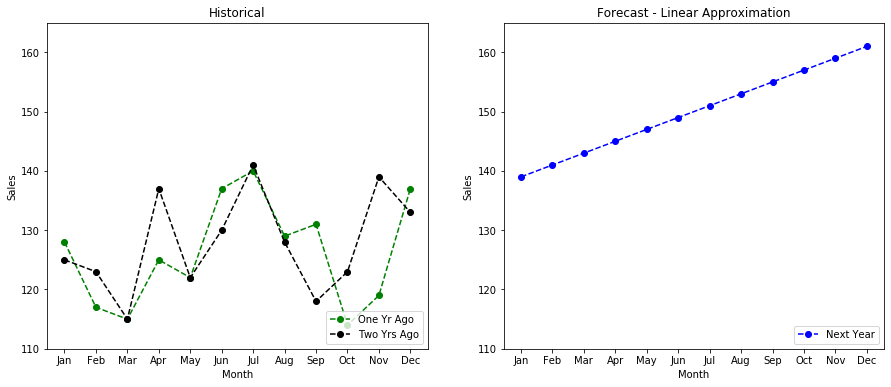

In [69]:
make_plots(linear_approximation, 'Linear Approximation')

## <a name="leastsquaresregression"></a>Method 6: Least Squares Regression

Finds a line of best fit via the Least Squares Method and apply the resulting slope ($m$) and intercept ($b$) to generate the forecasted values with the formula $y = mx + b$.

In [74]:
periods_6 = 4
x = range(1, periods_6 + 1)
y = one_year_ago[-periods_6:]

slope_6, intercept_6, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(slope_6, intercept_6)  # 2.3, 119.5

least_squares_regression = [Decimal(i * slope_6 + intercept_6) for i in range(periods_6 + 1, periods_6 + 13)]
least_squares_regression

2.3 119.5


[Decimal('131'),
 Decimal('133.30000000000001136868377216160297393798828125'),
 Decimal('135.599999999999994315658113919198513031005859375'),
 Decimal('137.900000000000005684341886080801486968994140625'),
 Decimal('140.19999999999998863131622783839702606201171875'),
 Decimal('142.5'),
 Decimal('144.80000000000001136868377216160297393798828125'),
 Decimal('147.099999999999994315658113919198513031005859375'),
 Decimal('149.400000000000005684341886080801486968994140625'),
 Decimal('151.69999999999998863131622783839702606201171875'),
 Decimal('154'),
 Decimal('156.30000000000001136868377216160297393798828125')]

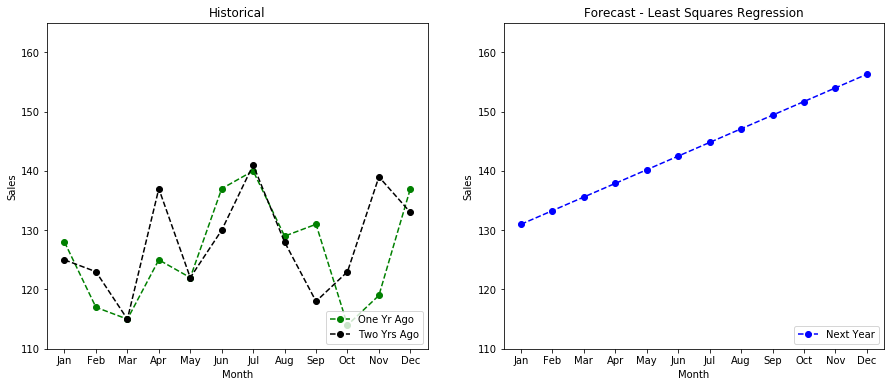

In [75]:
make_plots(least_squares_regression, 'Least Squares Regression')